# import

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [77]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [78]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [79]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
#df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
#sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [81]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [83]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [84]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [85]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [86]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [88]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
48793,id_12311,London,"['Mediterranean', 'European', 'Turkish']",12321.0,$,4.0,"[['Beef burger to die for!', 'Service sadly a ...",/Restaurant_Review-g186338-d11696089-Reviews-M...,d11696089,1,4.0
42685,id_1500,Edinburgh,"['Bar', 'Pub', 'British']",1503.0,NaN,22.0,"[['Quite expensive', 'Dark and odd decorations...",/Restaurant_Review-g186525-d3648621-Reviews-St...,d3648621,1,3.5
12467,id_2326,Rome,"['Italian', 'Mediterranean']",2327.0,$$ - $$$,128.0,"[['Delicious, Friendly and Inviting', 'Excelle...",/Restaurant_Review-g187791-d8827974-Reviews-Se...,d8827974,1,4.0
11092,id_4871,Paris,['Vegetarian Friendly'],4872.0,$$ - $$$,18.0,"[['Relaxing vegan café', 'a jewel in the marai...",/Restaurant_Review-g187147-d12631429-Reviews-C...,d12631429,1,4.5
13761,id_516,Berlin,"['Japanese', 'Asian', 'Sushi', 'Vegetarian Fri...",517.0,$$$$,88.0,"[['Great spot', 'very unique .. Japaneese .. B...",/Restaurant_Review-g187323-d10934451-Reviews-8...,d10934451,1,4.0


In [89]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [90]:
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [91]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [92]:
# Далее заполняем пропуски средним
data['Number of Reviews'].fillna(round(data['Number of Reviews'].mean()), inplace=True)

### 2. Обработка признаков

# **Restaurant_id**

Проверим, есть ли рестораны с одинаковыми id.

In [93]:
data['Restaurant_id'].value_counts()

id_633      19
id_436      19
id_871      19
id_227      19
id_321      18
            ..
id_11018     1
id_15905     1
id_10564     1
id_11627     1
id_12085     1
Name: Restaurant_id, Length: 13094, dtype: int64

Создадим список таких ресторанов и создадим признак

In [94]:
net = data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index.tolist()
data['Net'] = data['Restaurant_id'].apply(lambda x: 1 if x in net else 0)

In [95]:
data.Net.value_counts()

1    46193
0     3807
Name: Net, dtype: int64

# **City**

Города обработаем просто создав dummy признаки

In [96]:
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [97]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
23452,id_304,"['Cafe', 'European', 'Mediterranean', 'Central...",305.0,$$ - $$$,50.0,"[['Cool garden setting', 'Holiday in Krakow'],...",/Restaurant_Review-g274772-d7827375-Reviews-Me...,d7827375,1,4.5,...,0,0,0,0,0,0,0,0,0,0
32436,id_882,"['Danish', 'Cafe', 'European', 'Delicatessen']",883.0,NaN,18.0,"[['Great place', 'Bread, international newspap...",/Restaurant_Review-g189541-d4197547-Reviews-Ki...,d4197547,1,4.5,...,0,0,0,0,0,0,0,0,0,0
17401,id_5536,['Spanish'],5537.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187497-d4886212-Reviews-Ba...,d4886212,1,4.0,...,0,0,0,0,0,0,0,0,0,0
41261,id_2291,['Vegetarian Friendly'],2293.0,$$ - $$$,34.0,"[['Nice place for a contemporary dining', 'EXC...",/Restaurant_Review-g187514-d9753784-Reviews-Ma...,d9753784,1,4.0,...,0,0,0,0,0,0,0,0,0,0
26688,id_523,"['Polish', 'Pizza', 'European', 'Eastern Europ...",524.0,$$ - $$$,164.0,"[['Great little bar nice beers', 'Pizza good']...",/Restaurant_Review-g274772-d3702689-Reviews-Zl...,d3702689,1,3.5,...,0,0,0,0,0,0,0,0,0,0


# **Cuisine Style**

Создадим новый признак с количеством кухонь в ресторане.
Пропуски будем считать как 1, т.к. отсутствие слиля кухни - это тоже стиль кухни.

In [99]:
data['Number_of_styles'] = data['Cuisine Style'].apply(lambda x: 1 if pd.isna(x)==True else len(x[1:-1].split(', ')) )

In [100]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Number_of_styles
47263,id_644,"['Polish', 'European', 'Eastern European', 'Ce...",645.0,$$ - $$$,84.0,"[['Lovely place', 'Good food!'], ['09/22/2016'...",/Restaurant_Review-g274772-d1047455-Reviews-Bo...,d1047455,1,4.0,...,0,0,0,0,0,0,0,0,0,4
17687,id_6033,"['British', 'Turkish', 'Cafe']",6042.0,$,15.0,"[['Best cafe in Tottenham,', 'Local breakfast'...",/Restaurant_Review-g186338-d8329294-Reviews-En...,d8329294,1,4.5,...,0,0,0,0,0,0,0,0,0,3
24385,id_3543,"['Italian', 'Pizza', 'Mediterranean', 'Barbecu...",3544.0,$$ - $$$,803.0,"[['Mum of 2', 'Great place, excellent food, ve...",/Restaurant_Review-g187791-d5812261-Reviews-Mu...,d5812261,1,3.5,...,0,0,0,1,0,0,0,0,0,5
20794,id_4870,"['Pizza', 'Italian', 'Mediterranean', 'Vegetar...",4879.0,$$ - $$$,131.0,"[['Brilliant Pizza Restaurant', ""Good food in ...",/Restaurant_Review-g186338-d4607347-Reviews-Th...,d4607347,1,3.5,...,0,0,0,0,0,0,0,0,0,4
9100,id_9100,['Italian'],3000.0,$$$$,26.0,"[['Beautiful view of the city', 'Relaxing, gre...",/Restaurant_Review-g187849-d12362034-Reviews-L...,d12362034,0,0.0,...,0,0,0,0,0,0,0,0,0,1


# **Price Range**

In [101]:
data['Price Range'].value_counts(dropna = False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Зафиксируем пропуски

In [102]:
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

И переведем этот признак в числовой формат, попутно заполняя пропуски наиболее часто встречающимся значением

In [103]:
def price_range(price):
    if price == '$':
        return 1
    elif price == '$$ - $$$':
        return 2
    elif price == '$$$$':
        return 3
    else:
        return 2

data['Price Range'] = data['Price Range'].apply(lambda x: price_range(x))

In [104]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Number_of_styles,Price Range_isNAN
31562,id_3836,['Pizza'],3838.0,2,186.0,"[[], []]",/Restaurant_Review-g187849-d3199193-Reviews-Pa...,d3199193,1,3.5,...,0,0,0,0,0,0,0,0,1,1
37964,id_1996,NaN,2012.0,2,10.0,"[['Excellent', 'Excellent value for money and ...",/Restaurant_Review-g187309-d7060724-Reviews-Fr...,d7060724,1,4.0,...,0,0,0,0,0,0,0,0,1,1
33500,id_1612,"['Irish', 'Pub', 'European', 'Czech']",1615.0,1,31.0,"[['Food is good', 'Excellent Guinness'], ['04/...",/Restaurant_Review-g274707-d5456501-Reviews-Me...,d5456501,1,4.0,...,0,1,0,0,0,0,0,0,4,0
26578,id_835,NaN,837.0,2,15.0,"[['A perfect place for a tasty meal', 'Have ti...",/Restaurant_Review-g187331-d7106294-Reviews-Ca...,d7106294,1,4.0,...,0,0,0,0,0,0,0,0,1,1
2834,id_2834,['Mediterranean'],13201.0,2,9.0,"[['Average', 'Yummy Mix Grill'], ['11/08/2015'...",/Restaurant_Review-g186338-d2185919-Reviews-So...,d2185919,0,0.0,...,0,0,0,0,0,0,0,0,1,1


**Признаки Reviews, URL_TA, ID_TA в обработке не нуждаются**

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.

### Посмотрим распределение признака

<AxesSubplot:>

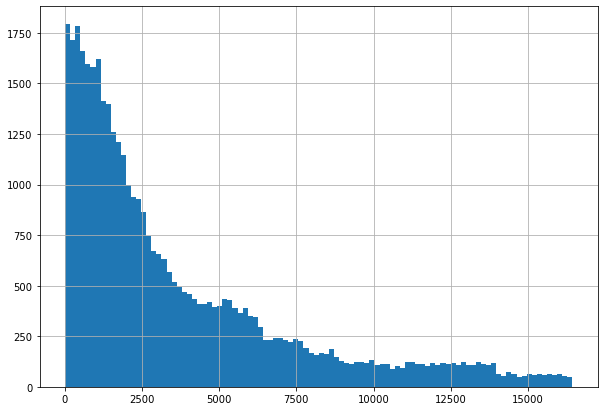

In [105]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

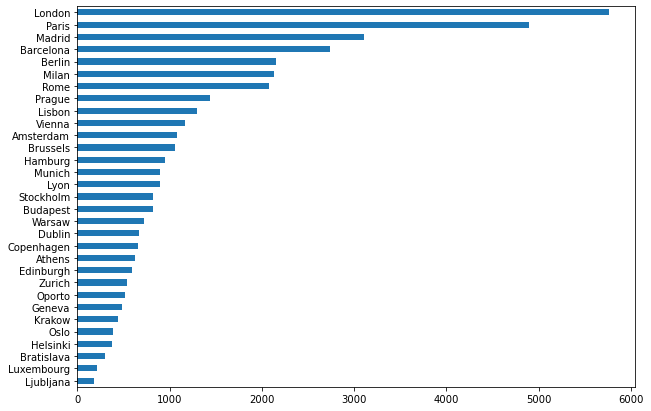

In [106]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

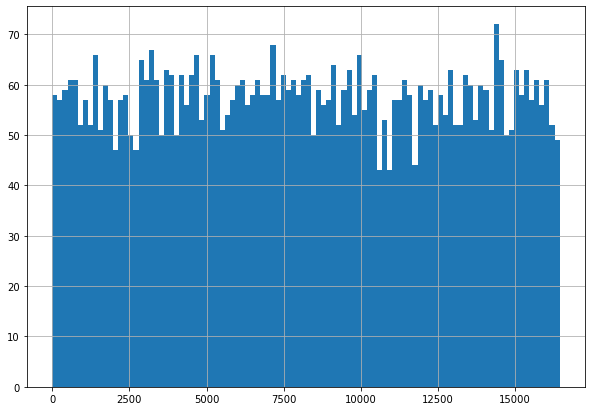

In [107]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

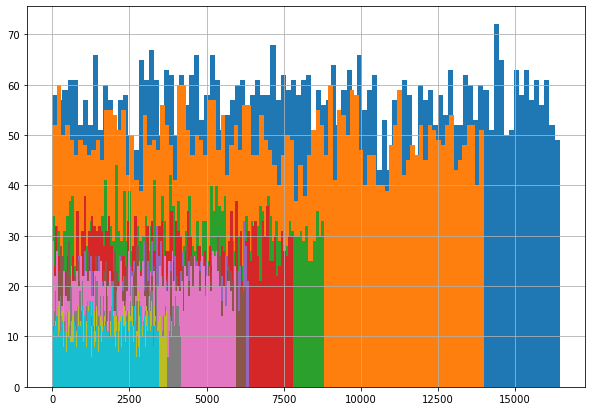

In [108]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

<AxesSubplot:>

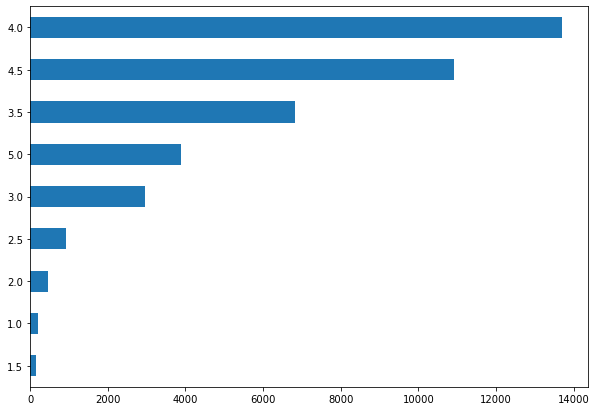

In [109]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

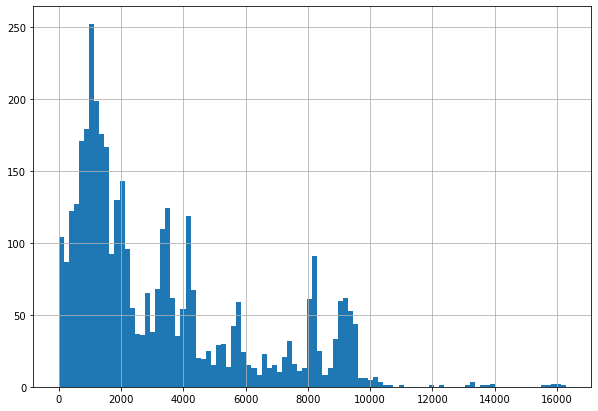

In [110]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

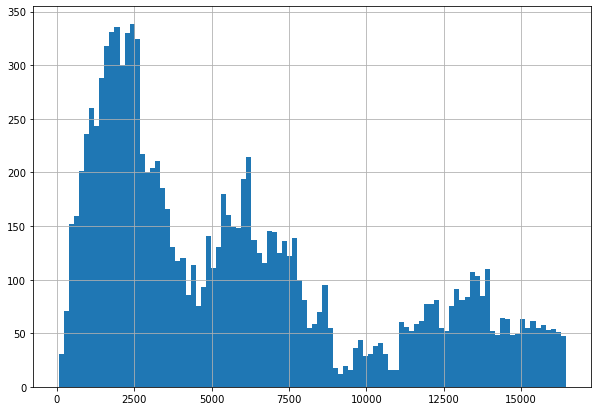

In [111]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

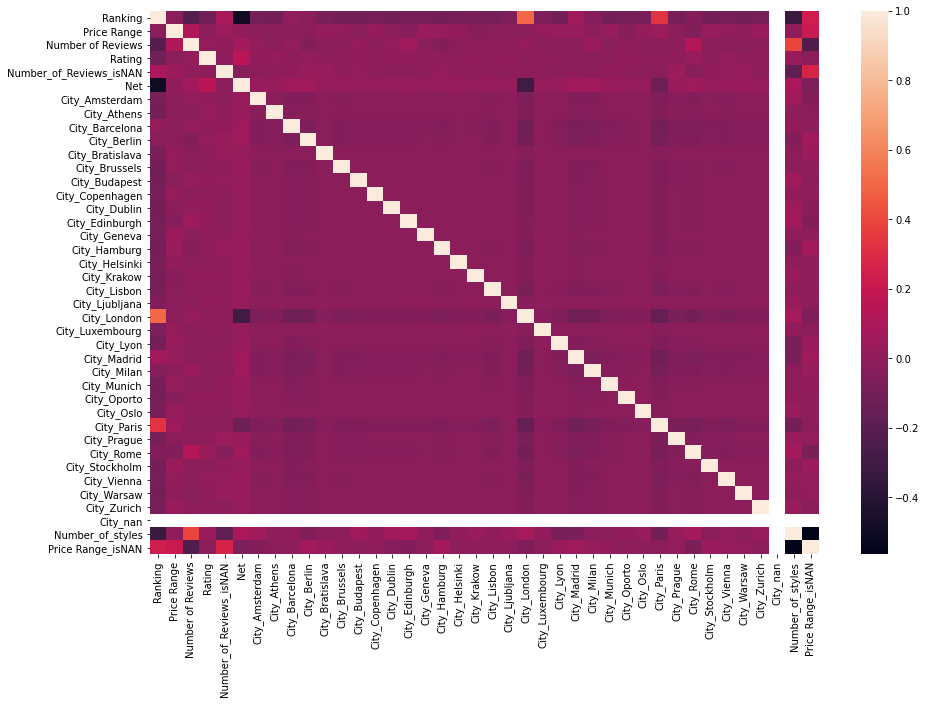

In [112]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [113]:
# на всякий случай, заново подгружаем данные
#df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [114]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(round(df_output['Number of Reviews'].mean()), inplace=True)
    
    net = df_output.Restaurant_id.value_counts()[df_output.Restaurant_id.value_counts() > 1].index.tolist()
    df_output['Net'] = df_output['Restaurant_id'].apply(lambda x: 1 if x in net else 0)
    
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    df_output['Number_of_styles'] = df_output['Cuisine Style'].apply(lambda x: 1 if pd.isna(x)==True else len(x[1:-1].split(', ')) )
    
    df_output['Price Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')
    
    def price_range(price):
        if price == '$':
            return 1
        elif price == '$$ - $$$':
            return 2
        elif price == '$$$$':
            return 3
        else:
            return 2
    
    df_output['Price Range'] = df_output['Price Range'].apply(lambda x: price_range(x))
    
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [115]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Net,City_Amsterdam,City_Athens,City_Barcelona,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Number_of_styles,Price Range_isNAN
17896,1402.0,2,51.0,1,4.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,2,1
5516,4182.0,2,124.0,0,0.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,2,1
42755,14847.0,2,124.0,1,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
37476,2838.0,1,3.0,1,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
18735,96.0,2,496.0,1,4.5,0,1,1,0,0,...,0,0,0,0,0,0,0,0,8,0
43995,330.0,2,31.0,1,4.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
21640,769.0,2,51.0,1,5.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,6,0
43647,372.0,2,57.0,1,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,0
3990,3102.0,2,347.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5,0
23992,253.0,2,153.0,1,4.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,5,0


In [116]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  50000 non-null  float64
 1   Price Range              50000 non-null  int64  
 2   Number of Reviews        50000 non-null  float64
 3   sample                   50000 non-null  int64  
 4   Rating                   50000 non-null  float64
 5   Number_of_Reviews_isNAN  50000 non-null  uint8  
 6   Net                      50000 non-null  int64  
 7   City_Amsterdam           50000 non-null  uint8  
 8   City_Athens              50000 non-null  uint8  
 9   City_Barcelona           50000 non-null  uint8  
 10  City_Berlin              50000 non-null  uint8  
 11  City_Bratislava          50000 non-null  uint8  
 12  City_Brussels            50000 non-null  uint8  
 13  City_Budapest            50000 non-null  uint8  
 14  City_Copenhagen       

In [117]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [118]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [119]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 40), (40000, 40), (40000, 39), (32000, 39), (8000, 39))

# Model 
Сам ML

In [120]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [121]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [122]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [123]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21131312500000002


<AxesSubplot:>

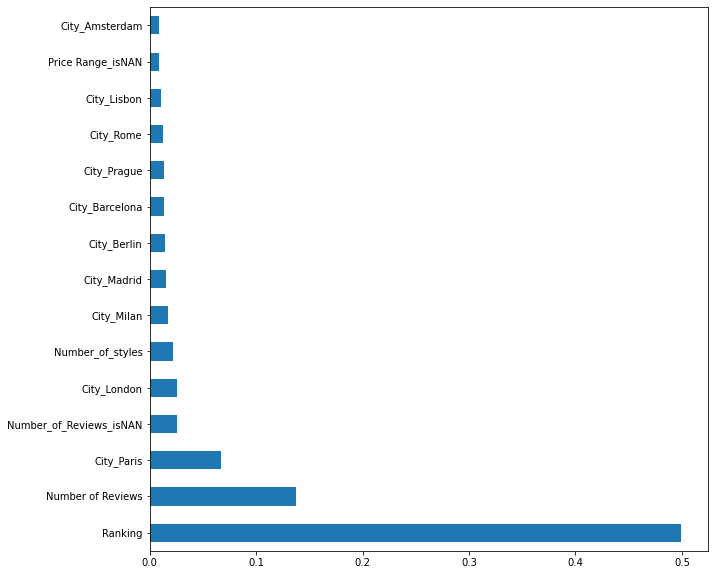

In [124]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [125]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,Net,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Number_of_styles,Price Range_isNAN
8236,4314.0,2,7.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1128,5685.0,2,124.0,0.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
8138,1060.0,2,528.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
991,9880.0,2,12.0,0.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9813,1520.0,2,470.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
5817,348.0,2,212.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3440,14653.0,2,13.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8574,11110.0,2,20.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
5910,5008.0,2,73.0,0.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
7273,1351.0,2,4.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [126]:
test_data = test_data.drop(['Rating'], axis=1)

In [127]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [128]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [129]:
predict_submission

array([3.015, 4.325, 4.52 , ..., 3.03 , 4.495, 4.245])

In [130]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.015
1,id_1,4.325
2,id_2,4.520
3,id_3,4.170
4,id_4,4.450
5,id_5,4.645
6,id_6,2.105
7,id_7,2.645
8,id_8,4.135
9,id_9,4.735


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
